In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"X tarin shape >> {x_train.shape}")
print(f"y tarin shape >> {y_train.shape}")
print(f"X test shape >> {x_test.shape}")
print(f"y test shape >> {y_test.shape}")

X tarin shape >> (60000, 28, 28)
y tarin shape >> (60000,)
X test shape >> (10000, 28, 28)
y test shape >> (10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

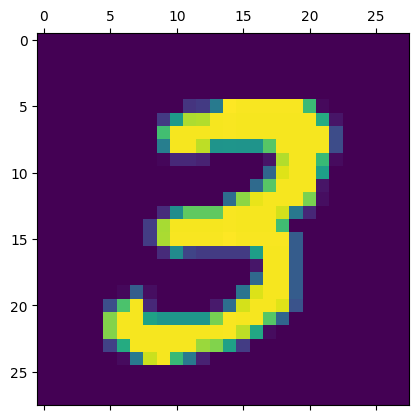

In [6]:
plt.matshow(x_train[7])

In [7]:
y_train[7]

3

In [8]:
x_train.shape

(60000, 28, 28)

## Create simple NN

### Now, we need to flatten the X data, insted of 2D array 28 x 28, we need it to be 1D array
### so we will use use keras.layers.Flatten

### We will create sequential NN with total outputs of 10 (total digits), and inport of shape (784,0)
### wich is the shape of each item in X

In [9]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)


In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8059 - accuracy: 0.8402
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0669 - accuracy: 0.8789
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6535 - accuracy: 0.8848
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3403 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3191 - accuracy: 0.8870
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3659 - accuracy: 0.8882
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2696 - accuracy: 0.8895
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2482 - accuracy: 0.8895
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3624 - accuracy: 0.8898
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.012

## The overall score is less than 90%, but we will use it and check the prediction accuracy

In [11]:
y_predect = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


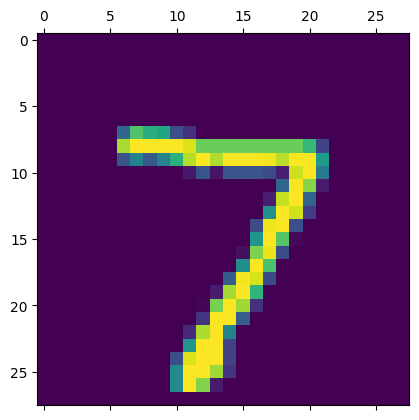

In [12]:
plt.matshow(x_test[0])

In [13]:
y_predect[0]

array([4.3223690e-20, 0.0000000e+00, 1.0960597e-13, 1.0000000e+00,
       2.8797278e-18, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [14]:
np.argmax(y_predect[0])

3

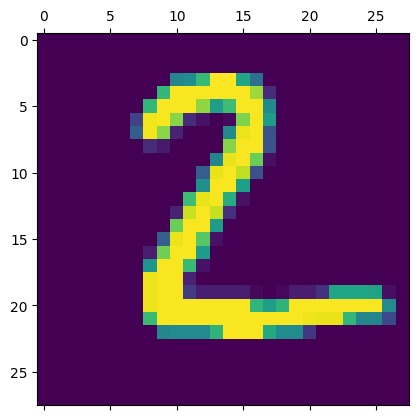

In [15]:
plt.matshow(x_test[1])

In [16]:
np.argmax(y_predect[1])

1

In [17]:
y_pred_lables = [np.argmax(i) for i in y_predect]

In [18]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_pred_lables)

Text(70.72222222222221, 0.5, 'Truth')

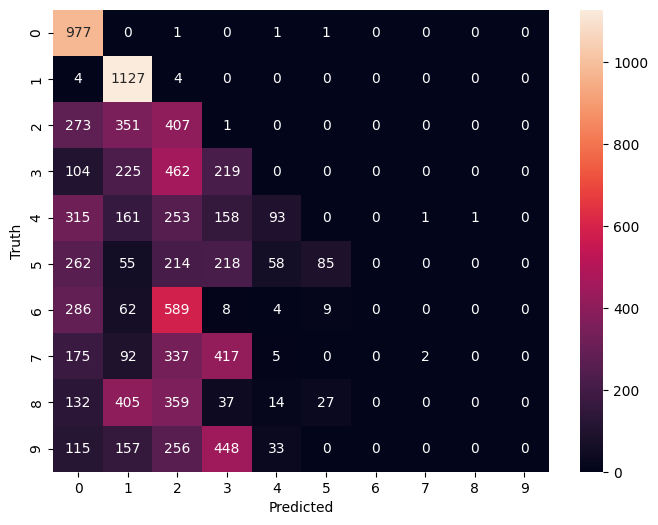

In [19]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## The above shows very poor results, so we will add extra hidden layers

# Adding Hidden Layers

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)


model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5139 - accuracy: 0.8767
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1982 - accuracy: 0.9436
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1578 - accuracy: 0.9555
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1313 - accuracy: 0.9632
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9676
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1011 - accuracy: 0.9722
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9757
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9778
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9791
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.069

## Overall score is over 98%, which is promising

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9710


[0.11119212955236435, 0.9710000157356262]

In [22]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
y_list = [np.argmax(i) for i in y_pred]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_list)

Text(70.72222222222221, 0.5, 'Truth')

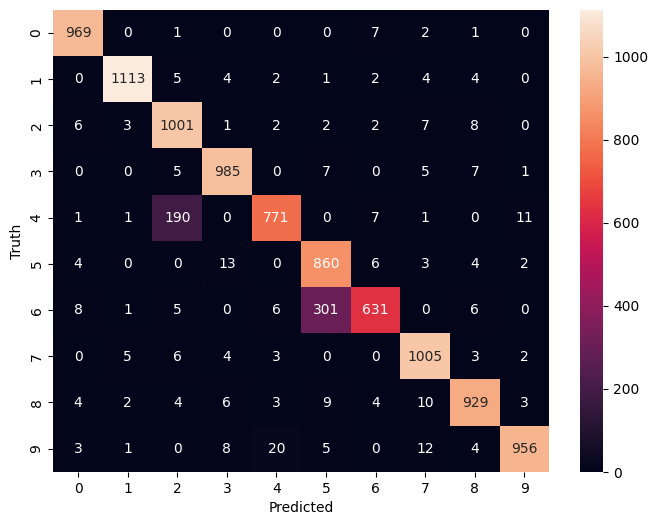

In [25]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

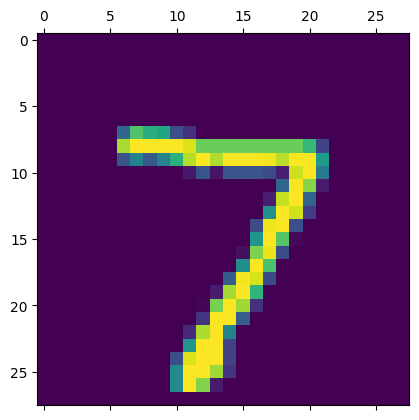

In [26]:
plt.matshow(x_test[0])

In [28]:
np.argmax(y_pred[0])

7

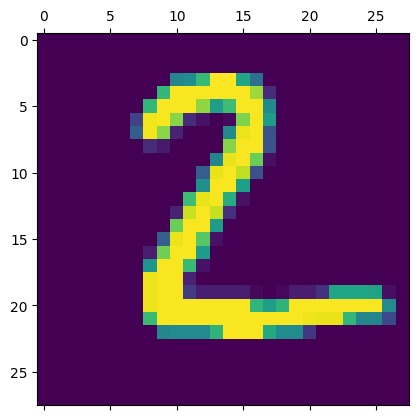

In [29]:
plt.matshow(x_test[1])

In [30]:
np.argmax(y_pred[1])

2

### The overall score is very good, we still face small challenges with number 4 and 6, but we can keep tuning the model

# Thank You :)

#
#
#